In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

# Load the IMDB dataset from CSV
df = pd.read_csv('imdb_dataset.csv')

In [2]:
# Preprocess the data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=100)
print(X)

[[ 123  210 3241 ...  125 4103  486]
 [ 175 3336   96 ... 1977   69  221]
 [  10  190    9 ...   63   16  350]
 ...
 [   7   30   86 ...    2    2 6050]
 [8462 5548    2 ...   67  739   42]
 [ 116  699  479 ...  794   11   17]]


In [3]:
# Convert labels to numerical values
y = df['sentiment'].map({'positive': 1, 'negative': 0}).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 100)
(10000, 100)
(40000,)
(10000,)


In [4]:
# Build the model
model = Sequential()
model.add(Embedding(10000, 32, input_length=100))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 323,201
Trainable params: 323,201
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
500/500 [==============================] - 3s 6ms/step - loss: 0.5047 - accuracy: 0.7558 - val_loss: 0.3318 - val_accuracy: 0.8576
Epoch 2/20
500/500 [==============================] - 3s 5ms/step - loss: 0.2616 - accuracy: 0.8959 - val_loss: 0.3157 - val_accuracy: 0.8629
Epoch 3/20
500/500 [==============================] - 3s 5ms/step - loss: 0.1778 - accuracy: 0.9390 - val_loss: 0.3178 - val_accuracy: 0.8631
Epoch 4/20
500/500 [==============================] - 3s 5ms/step - loss: 0.1059 - accuracy: 0.9746 - val_loss: 0.3397 - val_accuracy: 0.8576
Epoch 5/20
500/500 [==============================] - 3s 6ms/step - loss: 0.0560 - accuracy: 0.9929 - val_loss: 0.3657 - val_accuracy: 0.8544
Epoch 6/20
500/500 [==============================] - 3s 6ms/step - loss: 0.0289 - accuracy: 0.9982 - val_loss: 0.3931 - val_accuracy: 0.8530
Epoch 7/20
500/500 [==============================] - 3s 5ms/step - loss: 0.0160 - accuracy: 0.9996 - val_loss: 0.4191 - val_accuracy: 0.8526
Epoch 

In [6]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [7]:
acc = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']

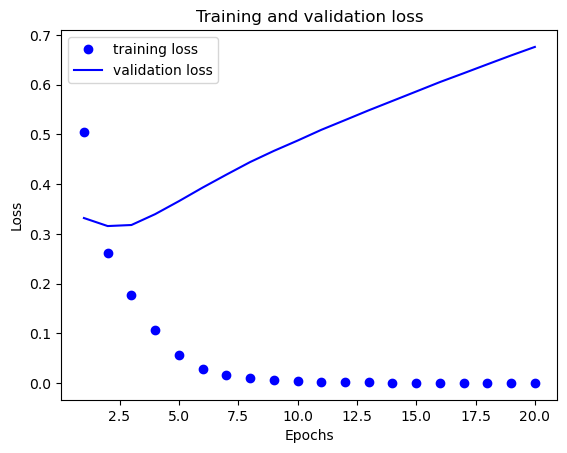

In [8]:
#plotting training and validation loss
import matplotlib.pyplot as plt
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss,'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

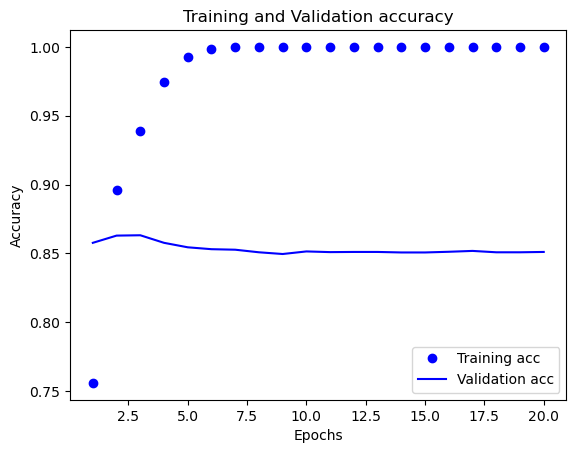

In [9]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.6442 - accuracy: 0.8539
Test Accuracy: 0.8539000153541565
